In [141]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns   


In [142]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [143]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [144]:
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [145]:
region_new=pd.get_dummies(data['region'],drop_first=True, dtype=int)
data=pd.concat([data,region_new],axis=1)
data.drop('region',axis=1,inplace=True)
data.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


In [146]:
data.describe() 

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


<Axes: >

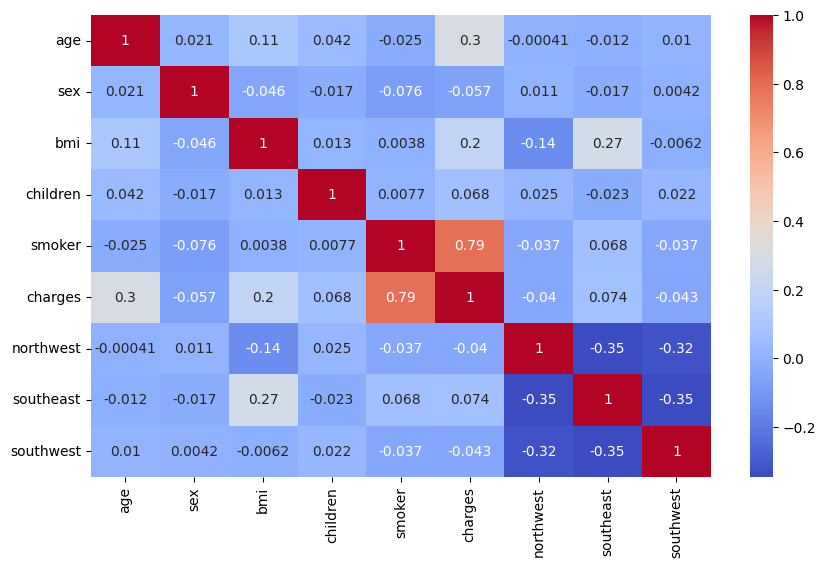

In [147]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

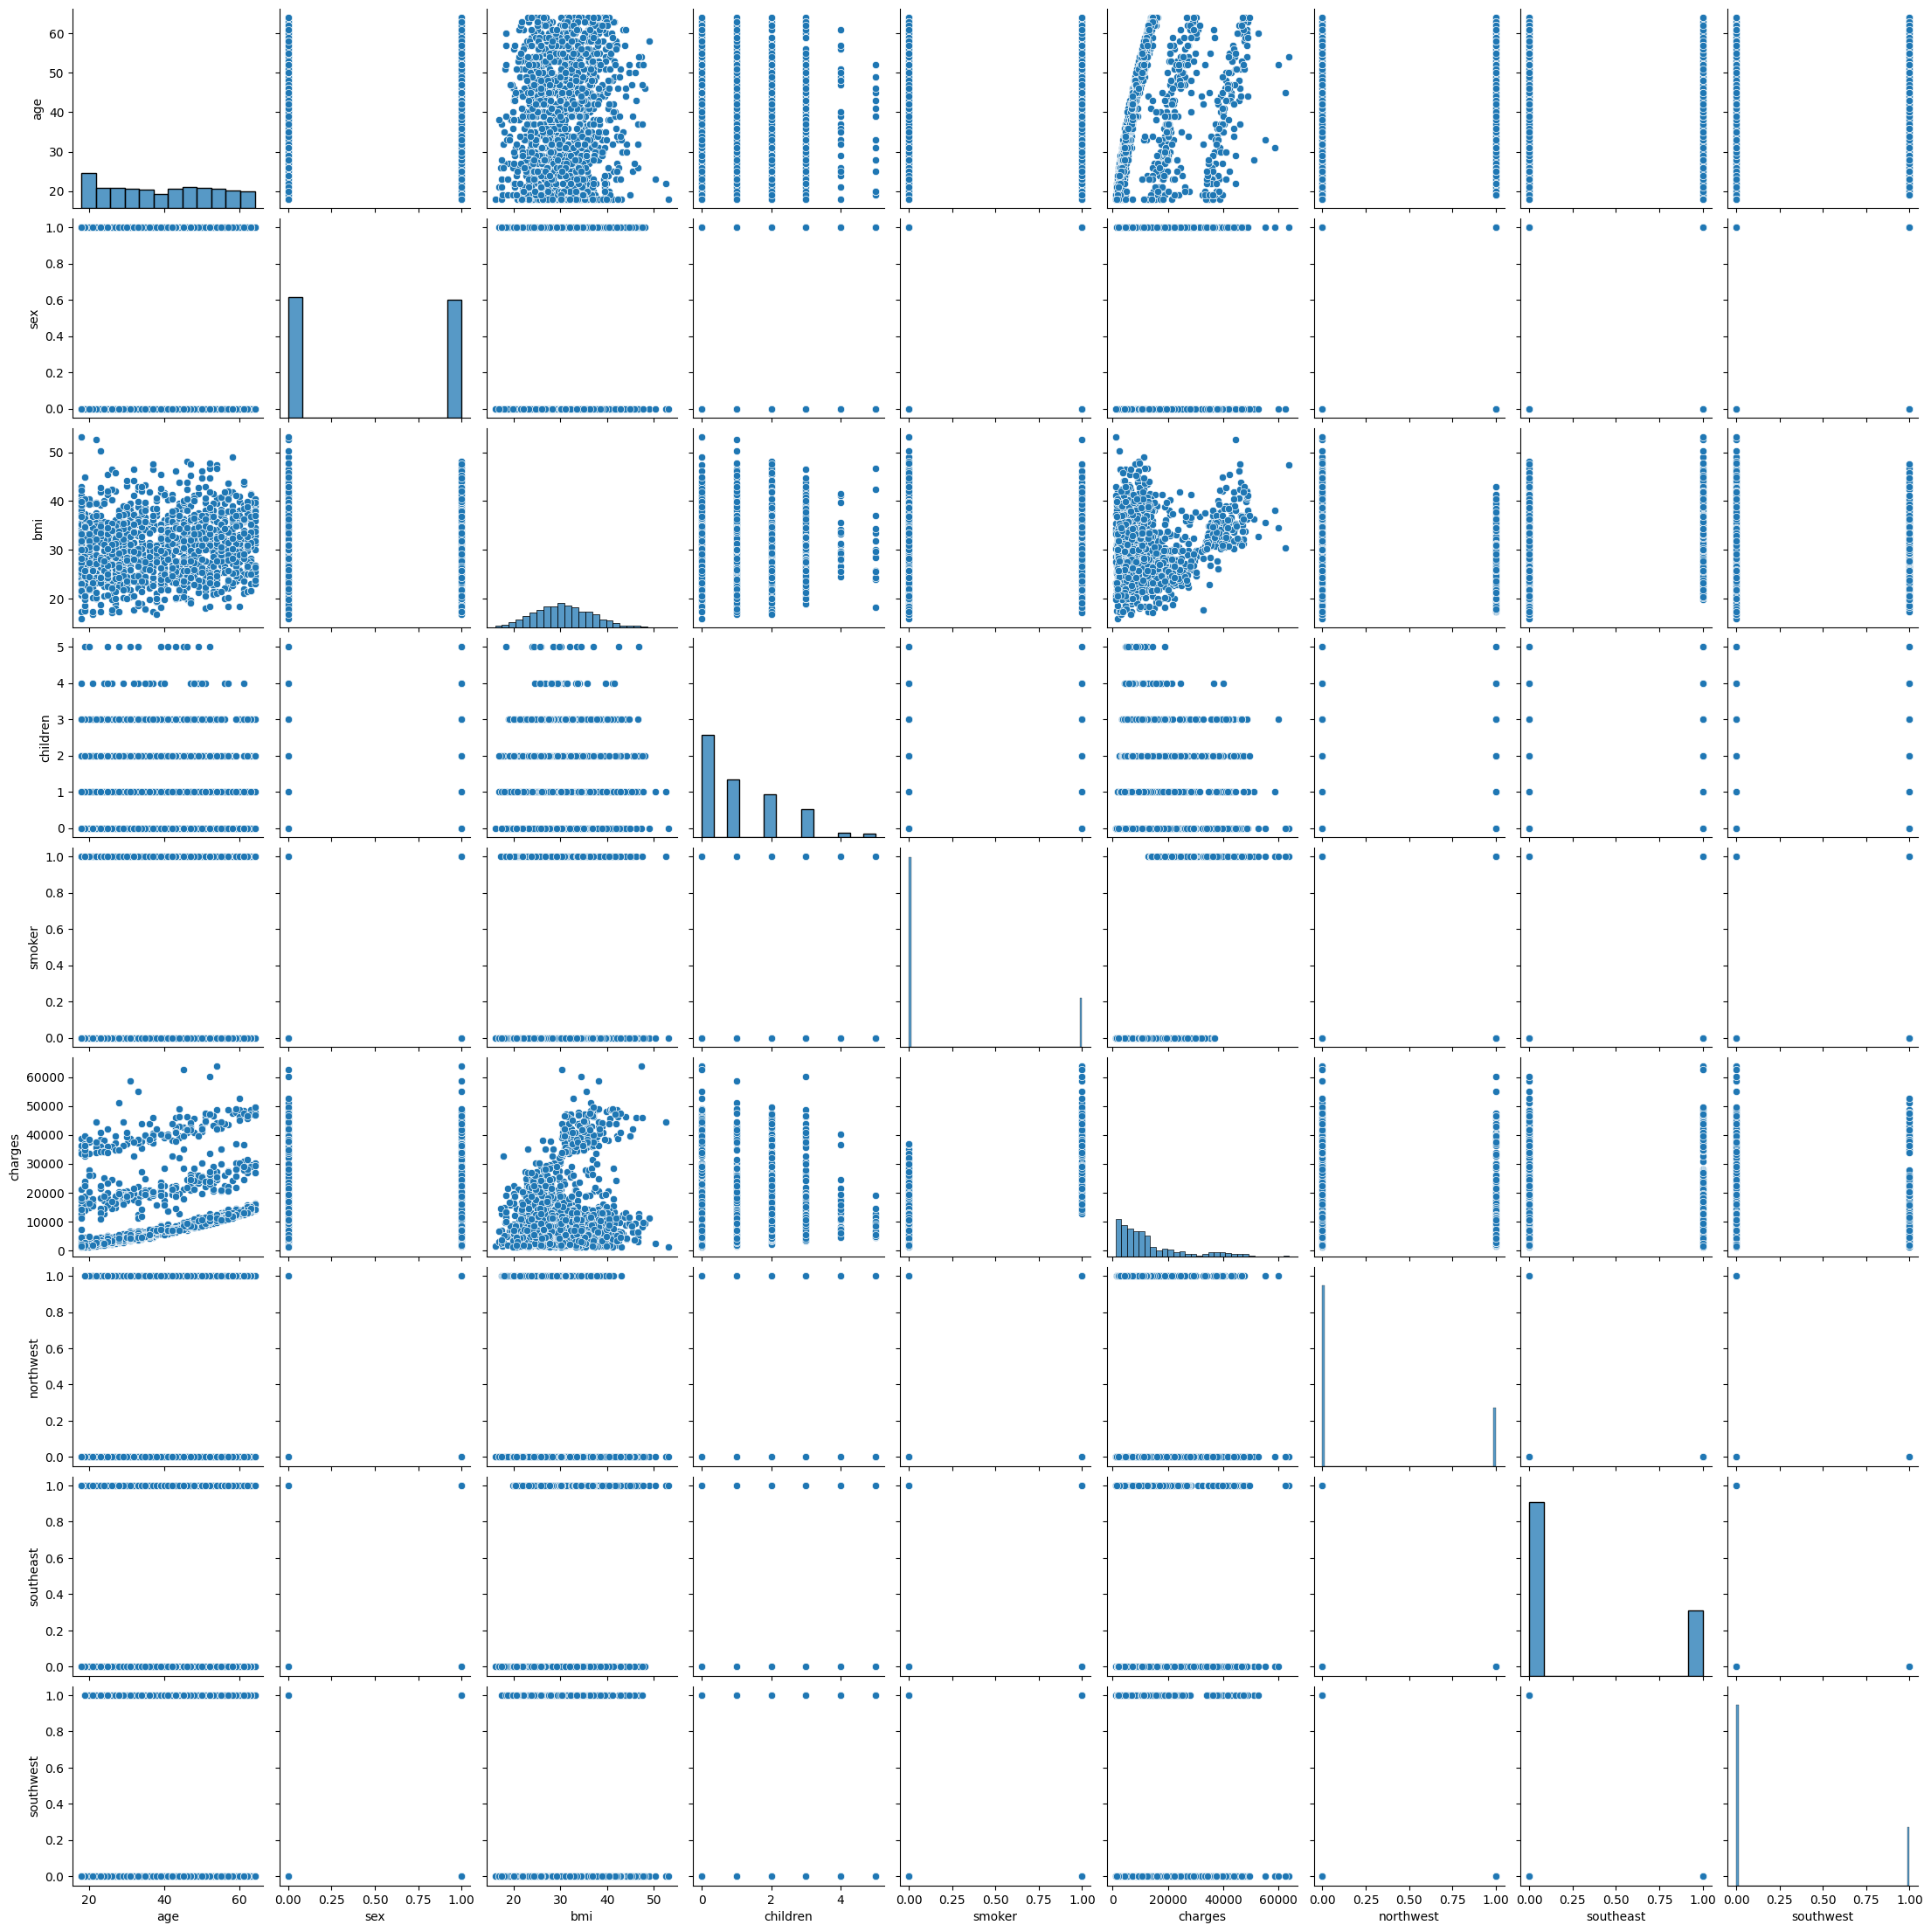

In [148]:
sns.pairplot(data)

In [149]:
X=data.drop(columns='charges', axis=1)
y=data['charges']

In [150]:
scaler_x=StandardScaler()
X_scaled=scaler_x.fit_transform(X)
scaler_y=StandardScaler()
y_scaled=scaler_y.fit_transform(y.values.reshape(-1,1))

In [151]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [152]:
lin_reg=LinearRegression()

In [153]:
lin_reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [154]:
train_pred=lin_reg.predict(x_train)
train_pred=scaler_y.inverse_transform(train_pred)
y_train=scaler_y.inverse_transform(y_train)
print('MAE:', metrics.mean_absolute_error(y_train, train_pred))
print('MSE:', metrics.mean_squared_error(y_train, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R2:', metrics.r2_score(y_train, train_pred))

MAE: 4208.234572492226
MSE: 37277681.70201866
RMSE: 6105.545160099847
R2: 0.7417255854683333


In [155]:
test_pred=lin_reg.predict(x_test)
test_pred=scaler_y.inverse_transform(test_pred)
y_test=scaler_y.inverse_transform(y_test)
print('MAE:', metrics.mean_absolute_error(y_test, test_pred))
print('MSE:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('R2:', metrics.r2_score(y_test, test_pred))

MAE: 4181.194473753651
MSE: 33596915.85136148
RMSE: 5796.284659276275
R2: 0.7835929767120722


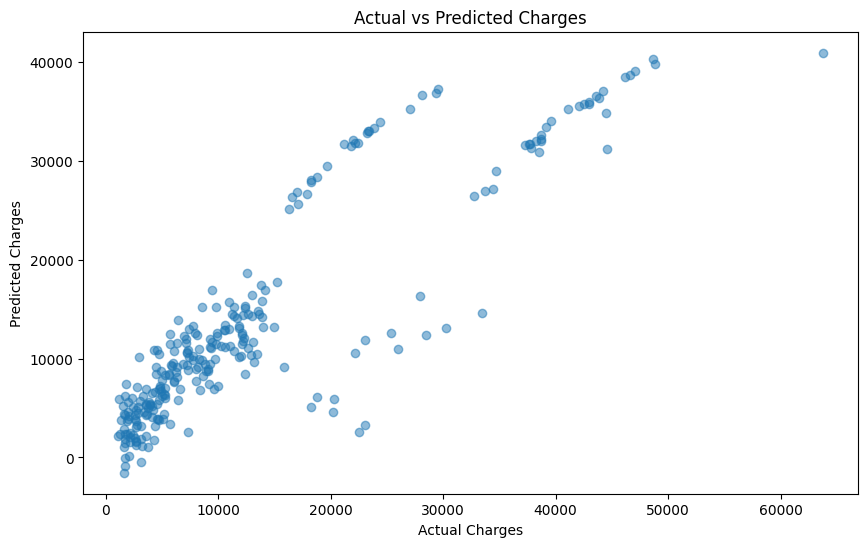

In [156]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, test_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

In [157]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [158]:
ann=keras.Sequential()
ann.add(Dense(units=50,input_dim=8, activation='relu'))
ann.add(Dense(units=100, activation='relu'))
ann.add(Dense(units=100, activation='relu'))
ann.add(Dense(units=50, activation='relu'))
ann.add(Dense(units=1 , activation='linear'))
ann.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

c:\Users\adith\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [159]:
ann.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 325403872.0000 - val_loss: 310131872.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 324153408.0000 - val_loss: 306851424.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 312400224.0000 - val_loss: 282752384.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 254999680.0000 - val_loss: 193048976.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 136248496.0000 - val_loss: 86912984.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71931328.0000 - val_loss: 61899708.0000
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54178996.0000 - val_loss: 48135524.0000
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44977052.0000 - val_loss: 40560284.0000
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40065692.0000 - val_loss: 36315520.0000
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37263952.0000 - val_loss: 33404754.0000
Epoch 11/100

In [160]:
train_pre=ann.predict(x_train)
train_pre=scaler_y.inverse_transform(train_pre)
y_train=scaler_y.inverse_transform(y_train)
print('MAE:', metrics.mean_absolute_error(y_train, train_pre))      
print('MSE:', metrics.mean_squared_error(y_train, train_pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pre)))
print('R2:', metrics.r2_score(y_train, train_pre))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 34227462.69514688
MSE: 3114051969923276.5
RMSE: 55803691.36466938
R2: 0.852770797351728


In [161]:
test_pre=ann.predict(x_test)
test_pre=scaler_y.inverse_transform(test_pre)   
y_test=scaler_y.inverse_transform(y_test)
print('MAE:', metrics.mean_absolute_error(y_test, test_pre))
print('MSE:', metrics.mean_squared_error(y_test, test_pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pre)))
print('R2:', metrics.r2_score(y_test, test_pre))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE: 33686285.84014692
MSE: 3018186760097559.5
RMSE: 54938026.539889105
R2: 0.8673358241924716


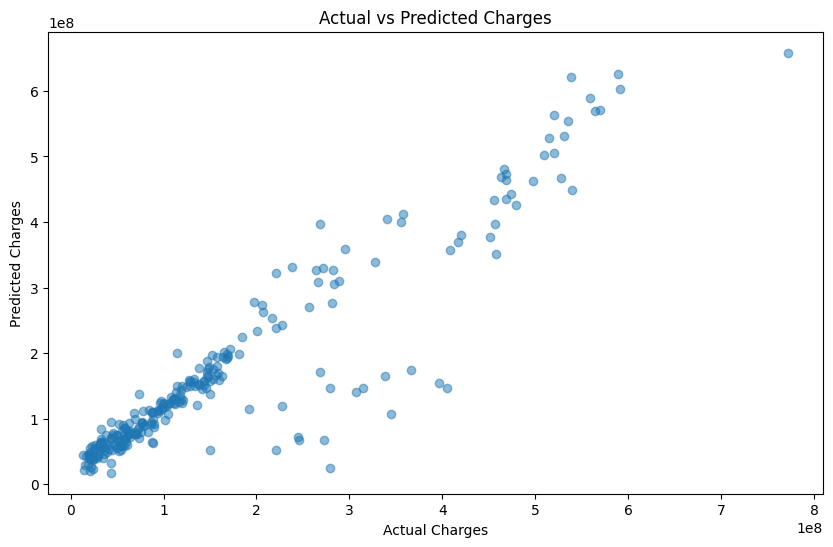

In [162]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, test_pre, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

neural nets